Olivier Simard-Morissette
260563480
January 26th, 2018

# 1 Model Selection

## 1.1

From Lecture 2 Slide 14: 

- X: N  X  M matrix of input data
- Y: N  x  1 vector of output data
- w: N  X  1 vector of weights.



- *Equation 1.0*: $ w = (X^{T}X)^{-1}X^{T} $ [Lecture 2 Slide 15]

- *Equation 1.1*: $ Mean Square Error(w) = \frac{(Y - Xw)^{T}(Y - Xw)}{N} $ [Lecture 2 Slide 14]






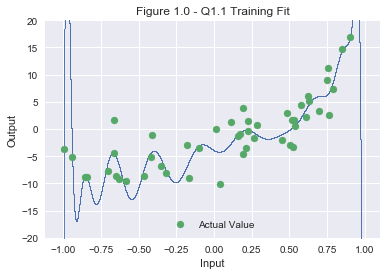

Train Error: 6.47473 


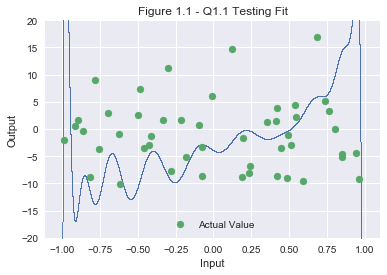

Test Error: 50.88464 


In [20]:
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(color_codes = True)

def read_scalar_datasets(file_path):
    '''
    Read CSV file into dataframe. Keep first two 
    columns and label as X and Y.
    '''
    dataset = pd.read_csv(file_path, header=None)
    dataset = dataset[[0, 1]]
    dataset.columns = ["X", "Y"]
    return dataset

def convert_scalar_to_numpy_array(dataframe):
    '''
    Take a pandas.Series and use built in function to convert to numpy arrays
    '''
    return dataframe['X'].as_matrix(), dataframe['Y'].as_matrix()

def get_model_of_degree(X, degree):
    '''
    Takes a numpy array of shape (N,) and converts into a 
    (N,X) matrix representing a polynomial function of degree.
    N represents the number of training samples in X. Note that the model
    adds a vector of 1s representing the constant term in a linear regression.
    ''' 
    vectors = []
    for i in range(degree + 1):
        if i == 0:
            vectors.append(np.ones(len(X)))
        else:
            vectors.append(np.power(X, i))
    return np.asarray(vectors).transpose()

def closed_form_linear_fit(X,Y):
    '''
    Implementation of Equation 1.0. Determines the optimal weights of a 
    Least Squares Solution Method using a closed-solution. Implemented as a
    series of matrix operations.
    '''
    x_transpose = X.transpose()
    x_t_inverse = np.linalg.inv(np.matmul(x_transpose, X))
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(x_transpose, X)), x_transpose), Y)

def get_mean_square_error(X,Y,W):
    '''
    Implementation of equation 1.1 
    
    '''
    error = np.subtract(Y, np.matmul(X, W))
    error_transpose = error.transpose()
    return np.matmul(error_transpose, error)[0][0] / Y.shape[0]

# Prepare training and test sets
ds1_train = read_scalar_datasets("Datasets/Dataset_1_train.csv")
ds1_train_x, ds1_train_y = convert_scalar_to_numpy_array(ds1_train)

ds1_test = read_scalar_datasets("Datasets/Dataset_1_test.csv")
ds1_test_x, ds1_test_y  = convert_scalar_to_numpy_array(ds1_test)


# Transform matrices for performing linear regression
XTRAIN = get_model_of_degree(ds1_train_x, 20)
YTRAIN = ds1_train_y.reshape(len(ds1_train_y), 1)
WTRAIN = closed_form_linear_fit(XTRAIN, YTRAIN)
XTEST = get_model_of_degree(ds1_test_x, 20)
YTEST = ds1_test_y.reshape(len(ds1_test_y), 1)

# Plot training results 
pyplot.figure(0)
x_graph = np.arange(-1.00,1.00001,0.00001)
pyplot.scatter(x_graph, np.polynomial.polynomial.polyval(x_graph, WTRAIN), s=0.3)
pyplot.scatter(ds1_train_x, ds1_train_y, label="Actual Value")
pyplot.xlabel('Input')
pyplot.ylabel('Output')
pyplot.ylim((-20, 20))
pyplot.title('Figure 1.0 - Q1.1 Training Fit')
pyplot.legend()
pyplot.show()
print("Train Error: %.5f "%(get_mean_square_error(XTRAIN, YTRAIN, WTRAIN)))


# Plot testing results
pyplot.figure(1)
pyplot.scatter(x_graph, np.polynomial.polynomial.polyval(x_graph, WTRAIN), s=0.3)
pyplot.scatter(ds1_test_x, ds1_train_y, label="Actual Value")
pyplot.xlabel('Input')
pyplot.ylabel('Output')
pyplot.ylim((-20, 20))
pyplot.title('Figure 1.1 - Q1.1 Testing Fit')
lgnd = pyplot.legend()

#change the marker size manually for both lines
pyplot.show()
print("Test Error: %.5f "%(get_mean_square_error(XTEST, YTEST, WTRAIN)))

Figure 1 shows that visually a 20 degree polynomial fit explains the training data well from x = -1.00 to x = 1.00. The fit on the test data shows that the model does not generalize well to new points. This is an example of overfitting. Overfitting is also reinforced by the values of the train and test error. The test error is 7.86 times the training error, again supporting that a n=20 degree model is overfitting the data. 

## 1.2

Equation 1.3   $ w = (X^{T}X + I\lambda)^{-1}X^{T}Y $ [Lecture 3 Slide 48]

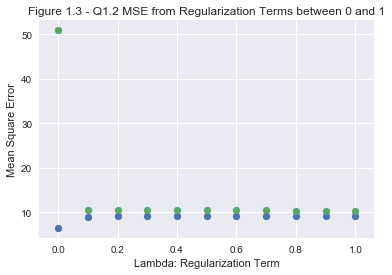

In [37]:
def closed_form_linear_fit_l2(X, Y, lambda_var):
    x_transpose = X.transpose()
    mult_x_x_transpose = np.matmul(x_transpose,X)
    identity_matrix_size = mult_x_x_transpose.shape[0]
    lambda_identity_matrix = lambda_var * np.identity(identity_matrix_size)
    return np.matmul(np.matmul(np.linalg.inv(np.add(mult_x_x_transpose, lambda_identity_matrix)),x_transpose),Y)


# For different values of lambda, we get the train and test error, place them into a list 
errors = []
for i in np.arange(0.0, 1.001, 0.1):
    WTRAINL2 = closed_form_linear_fit_l2(XTRAIN, YTRAIN,i)
    train_error = get_mean_square_error(XTRAIN,YTRAIN,WTRAINL2)
    test_error = get_mean_square_error(XTEST,YTEST,WTRAINL2)
    errors.append((train_error, test_error,i))

# Plotting the trainset, testset with lambda 
lambda_vars = [err[-1] for err in errors]
trainset_vars = [err[0] for err in errors]
testset_vars = [err[1] for err in errors]


pyplot.figure(0)
pyplot.scatter(lambda_vars,trainset_vars)
pyplot.scatter(lambda_vars,testset_vars)
pyplot.xlabel("Lambda: Regularization Term")
pyplot.ylabel("Mean Square Error")
pyplot.title("Figure 1.3 - Q1.2 MSE from Regularization Terms between 0 and 1")
pyplot.show()

By varying the regularization term, we get a significant improvement in the training and test set results. However it's difficult to visualize since the original training error is so high. The first datapoint was thus discarded to be able to visualize the regularization terms greater than 0 to 1.

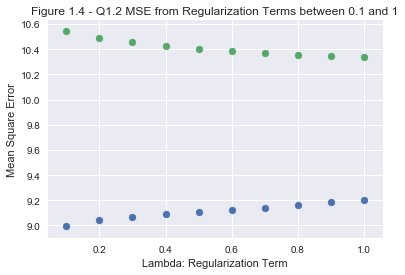

In [40]:
lambda_vars_no_zero = lambda_vars[1:]
trainset_vars_no_zero = trainset_vars[1:]
testset_vars_no_zero = testset_vars[1:]

pyplot.scatter(lambda_vars_no_zero,trainset_vars_no_zero)
pyplot.scatter(lambda_vars_no_zero,testset_vars_no_zero)
pyplot.xlabel("Lambda: Regularization Term")
pyplot.ylabel("Mean Square Error")
pyplot.title("Figure 1.4 - Q1.2 MSE from Regularization Terms between 0.1 and 1")
pyplot.show()
pyplot.close()


The best value of lambda was determined by looking at the percentage improvement in generalization (i.e. our performance on the test set) as we increase the value of lambda.

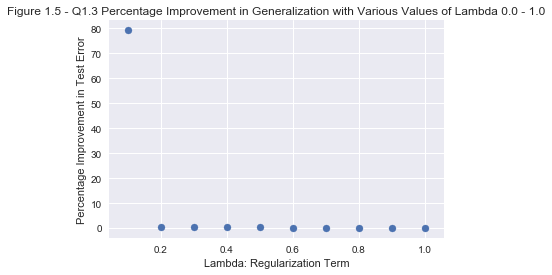

In [55]:
previous_error = errors[0]

percentage_improvements = []
for error in errors[1:]:
    percentage_improvement = abs((error[1] - previous_error[1]) / previous_error[1]) * 100
    previous_error = error
    percentage_improvements.append(percentage_improvement)
    
pyplot.scatter(lambda_vars_no_zero,percentage_improvements)
pyplot.xlabel('Lambda: Regularization Term')
pyplot.ylabel('Percentage Improvement in Test Error')
pyplot.title('Figure 1.5 - Q1.3 Percentage Improvement in Generalization with Various Values of Lambda 0.0 - 1.0')
pyplot.show()
    

The first introduction of a lambda turn led to an almost 80% improvement in test accuracy. However after this improvement, subsequent variations in lambda only lead to incremental improvements in test accuracy. To see the incremental gains in smaller values, the first value in this graph was again discarded.

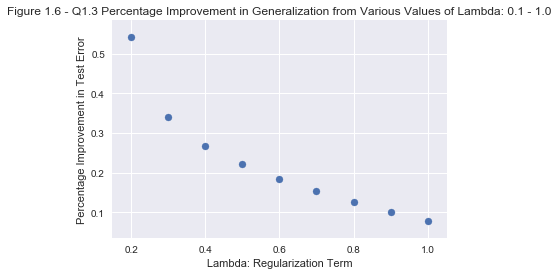

In [56]:
pyplot.scatter(lambda_vars_no_zero[1:],percentage_improvements[1:])
pyplot.xlabel('Lambda: Regularization Term')
pyplot.ylabel('Percentage Improvement in Test Error')
pyplot.title('Figure 1.6 - Q1.3 Percentage Improvement in Generalization from Various Values of Lambda: 0.1 - 1.0')
pyplot.show()

The percentage improvement in the test MSE was always a positive number so a lambda of 1.0 was selected. A lambda of 1.0 had a corresponding training error of 9.20 and a test error of 10.33. Using this lambda the fit was visualized to see if it was possible to guess the degree of the polynomial

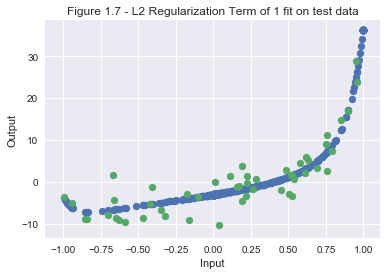

In [60]:
WTRAINL2 = closed_form_linear_fit_l2(XTRAIN, YTRAIN,0.90000000000000002)
pyplot.scatter(XTRAIN, np.polynomial.polynomial.polyval(XTRAIN,WTRAINL2))
pyplot.scatter(ds1_train_x, ds1_train_y)
pyplot.xlabel("Input")
pyplot.ylabel("Output")
pyplot.title("Figure 1.7 - L2 Regularization Training Fit")
pyplot.show()

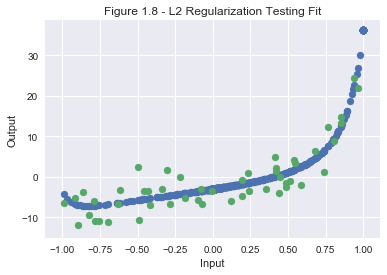

In [68]:
pyplot.scatter(XTEST,np.polynomial.polynomial.polyval(XTEST,WTRAINL2))
pyplot.scatter(ds1_test_x,ds1_test_y)
pyplot.xlabel("Input")
pyplot.ylabel("Output")
pyplot.title("Figure 1.8 - L2 Regularization Testing Fit")
pyplot.show()

I think the polynomial used to generate this model has a degree of 2 or 3. It is difficult to infer the exact degree from the visualization because there appears to be multiple degrees of freedom in the graph. A cross-validation of the polynomial degree may help achieve better clarity.

# Question 2

## 2.1

In [82]:
train_data = read_scalar_datasets('./Datasets/Dataset_2_train.csv')
test_data = read_scalar_datasets('./Datasets/Dataset_2_test.csv')
validate_data = read_scalar_datasets('./Datasets/Dataset_2_valid.csv')
q2_x_train, q2_y_train = convert_scalar_to_numpy_array(train_data)
q2_x_test, q2_y_test = convert_scalar_to_numpy_array(test_data)
q2_x_validate, q2_y_validate = convert_scalar_to_numpy_array(validate_data)




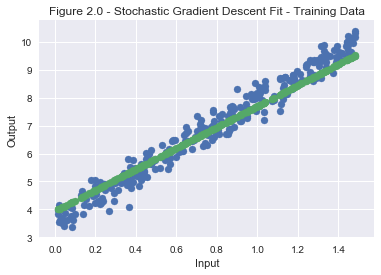

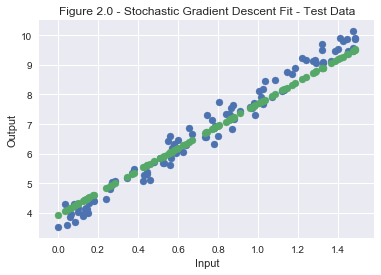

In [83]:
import random


Q2XTRAIN = get_model_of_degree(q2_x_train,1)
Q2YTRAIN = q2_y_train.reshape(len(q2_y_train),1)
Q2XVALIDATE = get_model_of_degree(q2_x_validate,1)
Q2YVALIDATE = q2_y_validate.reshape(len(q2_y_validate),1)

WSTART = np.asarray([[1.],[1.]])
alpha = 1e-6
epsilon = 0.0001

def online_gradient_descent(X, Y, WSTART, alpha, epsilon,XVALIDATE, YVALIDATE):
    '''
    Implementation of the stochastic gradient descent algorithm. 
    '''
    MSE_LIST = []
    W_LIST = []
    WCURRENT = WSTART
    while True:
        WNEXT = WCURRENT
        training_set = list(zip(X,Y))
        random.shuffle(training_set)
        for sample_x, sample_y in training_set:
            sample_x_vec = sample_x.reshape(2,1)
            sample_x_vec_transpose = sample_x_vec.transpose()
            sample_y_vec = sample_y.reshape(1,1)
            gradient = np.multiply(2,np.subtract(np.matmul(np.matmul(sample_x_vec,sample_x_vec_transpose),WNEXT),np.matmul(sample_x_vec,sample_y_vec)))
            WNEXT = WNEXT - alpha * gradient
            
        TRAIN_MSE = get_mean_square_error(X,Y,WNEXT)
        VALIDATE_MSE = get_mean_square_error(XVALIDATE, YVALIDATE, WNEXT)
        MSE_LIST.append((TRAIN_MSE, VALIDATE_MSE,WCURRENT))
            
        
        if np.linalg.norm(np.subtract(WNEXT,WCURRENT)) < epsilon:
            break
        
        WCURRENT = WNEXT
        
    return WCURRENT, MSE_LIST

weights, MSE_LIST = online_gradient_descent(Q2XTRAIN, Q2YTRAIN, WSTART, alpha, epsilon, Q2XVALIDATE, Q2YVALIDATE)

pyplot.figure(0)
pyplot.scatter(q2_x_train, q2_y_train)
pyplot.scatter(q2_x_train,np.polynomial.polynomial.polyval(q2_x_train,weights))
pyplot.xlabel("Input")
pyplot.ylabel("Output")
pyplot.title("Figure 2.0 - Stochastic Gradient Descent Fit - Training Data")
pyplot.show()

pyplot.figure(0)
pyplot.scatter(q2_x_test, q2_y_test)
pyplot.scatter(q2_x_test,np.polynomial.polynomial.polyval(q2_x_test,weights))
pyplot.xlabel("Input")
pyplot.ylabel("Output")
pyplot.title("Figure 2.0 - Stochastic Gradient Descent Fit - Test Data")
pyplot.show()


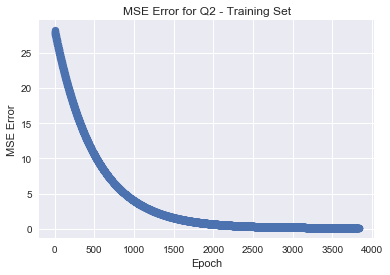

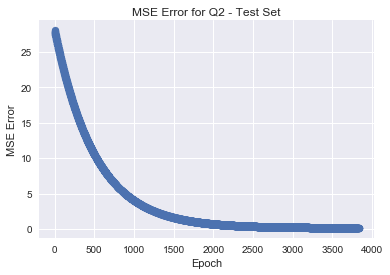

In [84]:
epoch = list(range(len(MSE_LIST)))
pyplot.figure(0)
pyplot.scatter(epoch, [error[0] for error in MSE_LIST], label="Training Error")
pyplot.title("MSE Error for Q2 - Training Set")
pyplot.xlabel("Epoch")
pyplot.ylabel("MSE Error")
pyplot.show()

pyplot.figure(1)
pyplot.scatter(epoch, [error[1] for error in MSE_LIST], label ="Test Error")
pyplot.title("MSE Error for Q2 - Test Set")
pyplot.xlabel("Epoch")
pyplot.ylabel("MSE Error")
pyplot.show()

In [89]:
#
# On this step I'm testing various step sizes and graphing them
#

alpha_list = [1e-5,1e-4,1e-3, 0.00175 ,0.0025, 0.0050]


MSE_LIST_ALPHA = []

for alpha in alpha_list:
    weights, MSE_LIST = online_gradient_descent(Q2XTRAIN, Q2YTRAIN, WSTART, alpha, epsilon, Q2XVALIDATE, Q2YVALIDATE)
    MSE = get_mean_square_error(Q2XVALIDATE, Q2YVALIDATE, weights)
    print("Alpha: %f"%(alpha), "MSE:%f"%(MSE), "Number of Iterations:%d"%(len(MSE_LIST)))
    MSE_LIST_ALPHA.append((alpha,MSE))

    
    
    




('Alpha: 0.000010', 'MSE:0.081352', 'Number of Iterations:2661')
('Alpha: 0.000100', 'MSE:0.074514', 'Number of Iterations:633')
('Alpha: 0.001000', 'MSE:0.073976', 'Number of Iterations:285')
('Alpha: 0.001750', 'MSE:0.074298', 'Number of Iterations:910')
('Alpha: 0.002500', 'MSE:0.073787', 'Number of Iterations:66')
('Alpha: 0.005000', 'MSE:0.074559', 'Number of Iterations:1230')


The number of iterations and the smallest MSE were chosen as factors in determining the best value of alpha. The best balance between these two factors seemed to occur around alpha being equal to 0.001. 

## 1.3

In [90]:
weights, MSE_LIST  = online_gradient_descent(Q2XTRAIN, Q2YTRAIN, WSTART, 0.001, epsilon, Q2XVALIDATE, Q2YVALIDATE)

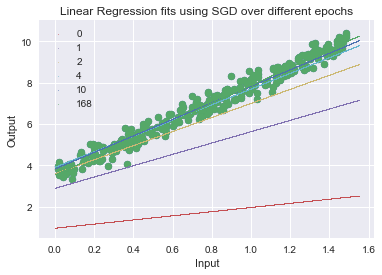

In [93]:
pyplot.scatter(q2_x_train, q2_y_train)

i_list = [0, 1, 2, 4, 10]
i = 0 

plot_points =  np.arange(0.0,1.55,0.0001)

for train_error, test_error, weights in MSE_LIST:
    if i in i_list or i == len(MSE_LIST) - 1 :
        pyplot.scatter(plot_points,np.polynomial.polynomial.polyval(plot_points,weights),label=i,s=0.2)
    i = i + 1 

pyplot.legend()
pyplot.title("Linear Regression fits using SGD over different epochs")
pyplot.xlabel("Input")
pyplot.ylabel("Output")
pyplot.show()
    
    

# Question 3 

In [ ]:
def q3_get_dataset(data, headers):
    with open(headers,'r') as labels_reader:
        labels = [line.strip() for line in labels_reader]
        return pd.read_csv(data,names = labels)

q3_df = q3_get_dataset('./Datasets/communities.data.txt','./Datasets/labels.txt')

columns_to_fill_na = list(q3_df[q3_df.columns[5:]].columns)


# Replacing with mean 
mean_not_available = []
for column in columns_to_fill_na:
    temp_column = q3_df[column].apply(lambda x : np.nan if x == "?" else float(x))
    q3_df.drop(labels=[column], axis="columns", inplace=True)
    q3_df[column] = temp_column
    mean = q3_df[column].mean()
    q3_df[column] = q3_df[column].fillna(mean)

q3_df.to_csv('./Dataset_Q3')
q3_df.head()

The process of replacing a missing value with the mean is preffered over an alternative like deleting the columns with missing data as it does not reduce the effective sample size. The samples with missing data points may follow a pattern that is not random and deleting these would cause the new sample set to not be representitive of the original. Furthermore the mean is fairly simple to calculate and substitute in but reduces the variability and variance of the data, thus introducing some bias. [1] 



In [ ]:
def split_into_n_folds(df, n_folds):
    fold_numbers = set(df['fold'])
    folds_per_group = len(fold_numbers) / n_folds
    fold_count = 0
    fold_list = []
    for fold in range(n_folds):
        fold_temp = df[(df.fold < (fold_count + folds_per_group)) & (df.fold > fold_count)]
        fold_list.append(fold_temp)
        fold_count = fold_count + 1 
    return fold_list

def q3_to_array(df, dependent_variable):
    y = dependent_variable
    y_temp = df[y].as_matrix()
    y_temp = y_temp.reshape(len(y_temp),1)
    x_temp = np.asarray([df[column].as_matrix() for column in df if column != y]).transpose()
    return x_temp, y_temp
    
    
def get_training_folds(train_fold_index,folds):
    return pd.concat([fold for j, fold in enumerate(folds) if j != train_fold_index])
   
    
def cross_validate(folds, question_num, non_predictive_features, dependent_variable, fitting_function, *args):
    MSE_LIST = [] 
    for i, validation_fold in enumerate(folds): 
        # Get the Training/Validation Datasets and save them as a csv.
        training_fold = get_training_folds(i, folds)
        training_fold.to_csv("Q%d-CandC-train%d.csv"%(question_num ,i))
        validation_fold.to_csv("Q%d-CandC-test%d.csv"%(question_num ,i))
        
        # Remove non-normalized, continous variables
        training_fold = training_fold[training_fold.columns.difference(non_predictive_features)]
        validation_fold = validation_fold[validation_fold.columns.difference(non_predictive_features)]
        
        # Convert to numpy matrices 
        validateX, validateY = q3_to_array(validation_fold, dependent_variable)
        trainX, trainY = q3_to_array(training_fold, dependent_variable)
        
        # Train Model on Training Fold (80%) and Get MSE on Validation Fold (20%)
        weights = fitting_function(trainX,trainY, *args)
        MSE = get_mean_square_error(validateX,validateY,weights)
        MSE_LIST.append({"MSE":MSE,"validation_fold":i,"weights":weights})
        
    return MSE_LIST
    

def get_average_mse(mse_list):
    return sum(experiment['MSE'] for experiment in mse_list) / len(mse_list)


def test_regular_linear_model(df, non_predictive_features, dependent_variable):
    fold_list = split_into_n_folds(df, 5)
    mse_list = cross_validate(fold_list, 3, non_predictive_features, dependent_variable , closed_form_linear_fit)
    cross_validation_error = get_average_mse(mse_list)
    return cross_validation_error, mse_list


def test_different_lambdas(df,lambdas, non_predictive_features, dependent):
    cross_validation_errors = [] 
    for i in lambdas:
        fold_list = split_into_n_folds(df, 5)
        mse_list = cross_validate(fold_list, 3, non_predictive_features, dependent, closed_form_linear_fit_l2, i)
        cross_validation_error = get_average_mse(mse_list)
        cross_validation_errors.append(cross_validation_error)
    return cross_validation_errors


def test_l2_linear_model(df, non_predictive_features, dependent_variable, regularization_constant):
    fold_list = split_into_n_folds(df, 5)
    mse_list = cross_validate(fold_list, 3, non_predictive_features, dependent_variable , closed_form_linear_fit_l2, regularization_constant)
    cross_validation_error = get_average_mse(mse_list)
    return cross_validation_error, mse_list
    




In [ ]:
non_predictive_features = ["state","county","community","communityname","fold"]
dependent_variable = "ViolentCrimesPerPop"

In [ ]:
cv_error, mse_list = test_regular_linear_model(q3_df, non_predictive_features, dependent_variable)
non_input_variables = non_predictive_features + [dependent_variable]

print("The average MSE is :%.5f"%(cv_error))
for i, fold in enumerate(mse_list):
    print("\n\nFold:%d"%(i))
    weights = fold['weights'].transpose()[0]
    column_names = q3_df.columns.difference(non_input_variables)
    for weight, feature in sorted(list(zip(weights, column_names)),key=lambda x : abs(x[0]), reverse=True):
        print("%s | %s"%(feature, weight))
    print("\n\n")

In [ ]:
lambdas = np.arange(0,1.1,0.1)
cv_errors = test_different_lambdas(q3_df,lambdas,non_predictive_features, dependent_variable)
scatter(lambdas, cv_errors)
pyplot.show()


    




The MSE does not depreciate significantly with L2 regularization. It seems to plateau around 0.035 so a regularization constant lambda of 0.2 was chosen since there isn't significant improvement after this point in the cross validation error. From this regularization, the coefficients of the new model help in feature selection. The importance of a variable in the linear regression is proportional to the magnitude of the coefficient. This is due to  all terms in the dataset being preprocessed and regularized to have a value between 0 and 1. 

In [ ]:
lambda_test = 0.2


def get_most_important_features(df,non_predictive_features,dependent_variable, regularization_term):
    columns_do_not_delete = non_independent_variable = list(set(non_predictive_features))
    columns_do_not_delete.append(dependent_variable)
    csv_error, mse_list = test_l2_linear_model(df, non_predictive_features, dependent_variable, regularization_term)
    feature_coefficient_dict = {}           
    for mse in mse_list:
        for feature in zip(df[df.columns.difference(columns_do_not_delete)],list(mse['weights'].transpose()[0])):
            if feature[0] in feature_coefficient_dict:
                feature_coefficient_dict[feature[0]].append(feature[1])
            else:
                feature_coefficient_dict[feature[0]] = [feature[1]]

    # Take the average importance not regularized. This will account for the values that vary 
    # between being positive and negative, thus having no predictive power over different folds 
    average_coefficient_dict = {}
    for feature in feature_coefficient_dict:
        average_coefficient_dict[feature] = np.average(feature_coefficient_dict[feature])
        
    top_results = sorted([{"feature":feature, "coefficient":average_coefficient_dict[feature]} for feature in average_coefficient_dict], reverse=True ,key = lambda x: abs(x["coefficient"]))
    return csv_error, [result['feature'] for result in top_results]

In [ ]:
# We remove the 10 least important features at a time and see if we get an improvement in mse
train_df = q3_df
csv_errors = [] 
for i in range(24):
    csv_error, most_important_features  = get_most_important_features(train_df, non_predictive_features, dependent_variable, 0)
    csv_errors.append((csv_error, len(most_important_features)))
    least_important_features = most_important_features[-5:]
    train_df = train_df[train_df.columns.difference(least_important_features)]

                     

In [ ]:
scatter([err[1] for err in csv_errors],[err[0] for err in csv_errors])
pyplot.show()

[1] Eekhout, I., R. M. de Boer, et al. (2012). Missing data: a systematic review of how they are reported and handled. Epidemiology 23(5): 729-732.





In [ ]:
print(csv_errors)

In [ ]:
scatter(q3_df['LemasSwFTPerPop'],q3_df['ViolentCrimesPerPop'])
pyplot.show()

In [ ]:
q3_df.corr()